# Test notebook

In [1]:
import sys
sys.path.append("../src")
from IPython.display import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# `rendering` module

In [2]:
import rendering

In [3]:
rend = rendering.ArmToolBallRenderer()

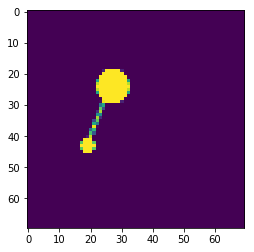

In [4]:
plt.imshow(rend._sample_corr())

In [5]:
image_list = list()
for i in range(50):
    arr = rend._sample_corr() * 255
    image_list.append(arr.reshape([70,70,1]).astype(np.int8))

# `environments` module

In [6]:
import environments

### ArmToolBall

In [9]:
arm_ball_static_config = dict(
    m_mins=[-1.] * 3,
    m_maxs=[1.] * 3, 
    s_mins=[-1.] * 3,
    s_maxs=[1.] * 3, 
    arm_lengths=[0.5, 0.3, 0.2], 
    arm_angle_shift=0.5,
    arm_rest_state=[0.] * 3,
    ball_size=0.1,
    ball_initial_position=[0.6, 0.6],
    tool_length = 2 * 20./70.,
    tool_initial_pose = [-0.7,-0.7,0.]
    )


static_env = environments.ArmToolBallStatic(**arm_ball_static_config)

In [10]:
static_env.update([0.5, 0.5, 0.5])

[0.6, 0.6, -0.7, -0.7, 0.0]

In [11]:
dynamic_env = environments.ArmToolBallDynamic(arm_ball_static_config, n_dmp_basis=3, goal_size=1.)

In [15]:
while dynamic_env.update(np.random.uniform(-1,1,9)).tolist()[0:2] == [ 0.6,  0.6]:
    dynamic_env.reset()

In [16]:
image_list = list()

for coord in dynamic_env.get_last_traj():
    coord = (coord+1)/2
    arr = rend.draw(coord.tolist()) * 255
    arr = arr.reshape([70,70,1])
    arr = np.repeat(arr,3,axis=-1)
    image_list.append(arr.astype(np.int8))

In [17]:
import moviepy.editor
clip = moviepy.editor.ImageSequenceClip(image_list, fps=25)
clip.ipython_display(width=512, autoplay=1, loop=1)

100%|██████████| 51/51 [00:00<00:00, 1756.44it/s]


### ArmBall

In [18]:
arm_ball_static_config = dict(
    m_mins=[-1.] * 3,
    m_maxs=[1.] * 3, 
    s_mins=[-1.] * 3,
    s_maxs=[1.] * 3, 
    arm_lengths=[0.5, 0.3, 0.2], 
    arm_angle_shift=0.5,
    arm_rest_state=[0.] * 3,
    ball_size=0.1,
    ball_initial_position=[0.6, 0.6],
    )


static_env = environments.ArmBallStatic(**arm_ball_static_config)

In [19]:
static_env.update([0.5, 0.5, 0.5])

[0.59999999999999998, 0.59999999999999998]

In [22]:
dynamic_env = environments.ArmBallDynamic(arm_ball_static_config, n_dmp_basis=3, goal_size=1.)
rend = rendering.ArmBallRenderer()

In [23]:
while dynamic_env.update(np.random.uniform(-1,1,9)).tolist() == [ 0.6,  0.6]:
    dynamic_env.reset()

In [24]:
image_list = list()

for coord in dynamic_env.get_last_traj():
    coord = (coord+1)/2
    arr = rend.draw(coord.tolist()) * 255
    arr = arr.reshape([70,70,1])
    arr = np.repeat(arr,3,axis=-1)
    image_list.append(arr.astype(np.int8))

In [25]:
import moviepy.editor
clip = moviepy.editor.ImageSequenceClip(image_list, fps=25)
clip.ipython_display(width=512, autoplay=1, loop=1)

100%|██████████| 51/51 [00:00<00:00, 956.61it/s]


### ArmTwoBall

In [27]:
arm_ball_static_config = dict(
    m_mins=[-1.] * 3,
    m_maxs=[1.] * 3, 
    s_mins=[-1.] * 3,
    s_maxs=[1.] * 3, 
    arm_lengths=[0.5, 0.3, 0.2], 
    arm_angle_shift=0.5,
    arm_rest_state=[0.] * 3,
    ball_size=0.1,
    balls_initial_position=[0.6, 0.6, -0.6, -0.6],
    )


static_env = environments.ArmTwoBallsStatic(**arm_ball_static_config)

In [28]:
static_env.update([0.5, 0.5, 0.5])

[0.6, 0.6, -0.6, -0.6]

In [30]:
dynamic_env = environments.ArmTwoBallsDynamic(arm_ball_static_config, n_dmp_basis=3, goal_size=1.)
rend = rendering.ArmTwoBallRenderer()

In [34]:
while dynamic_env.update(np.random.uniform(-1,1,9)).tolist() == [ 0.6,  0.6, -0.6, -0.6]:
    dynamic_env.reset()

In [35]:
image_list = list()

for coord in dynamic_env.get_last_traj():
    coord = (coord+1)/2
    arr = rend.draw(coord.tolist()) * 255
    arr = arr.reshape([70,70,1])
    arr = np.repeat(arr,3,axis=-1)
    image_list.append(arr.astype(np.int8))

In [36]:
import moviepy.editor
clip = moviepy.editor.ImageSequenceClip(image_list, fps=25)
clip.ipython_display(width=512, autoplay=1, loop=1)

100%|██████████| 51/51 [00:00<00:00, 1796.65it/s]


### ArmArrow

In [38]:
arm_ball_static_config = dict(
    m_mins=[-1.] * 3,
    m_maxs=[1.] * 3, 
    s_mins=[-1.] * 3,
    s_maxs=[1.] * 3, 
    arm_lengths=[0.5, 0.3, 0.2], 
    arm_angle_shift=0.5,
    arm_rest_state=[0.] * 3,
    arrow_size=0.1,
    arrow_initial_pose=[0.6, 0.6, 0.],
    )


static_env = environments.ArmArrowStatic(**arm_ball_static_config)

In [39]:
static_env.update([0.5, 0.5, 0.5])

[0.6, 0.6, 0.0]

In [40]:
dynamic_env = environments.ArmArrowDynamic(arm_ball_static_config, n_dmp_basis=3, goal_size=1.)
rend = rendering.ArmArrowRenderer()

In [41]:
while dynamic_env.update(np.random.uniform(-1,1,9)).tolist() == [ 0.6,  0.6, 0.]:
    dynamic_env.reset()

ValueError: all the input arrays must have same number of dimensions

In [24]:
image_list = list()

for coord in dynamic_env.get_last_traj():
    coord = (coord+1)/2
    arr = rend.draw(coord.tolist()) * 255
    arr = arr.reshape([70,70,1])
    arr = np.repeat(arr,3,axis=-1)
    image_list.append(arr.astype(np.int8))

In [25]:
import moviepy.editor
clip = moviepy.editor.ImageSequenceClip(image_list, fps=25)
clip.ipython_display(width=512, autoplay=1, loop=1)

100%|██████████| 51/51 [00:00<00:00, 956.61it/s]
